#Assignment 2

Prerequisites

In [2]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np


##Task 1

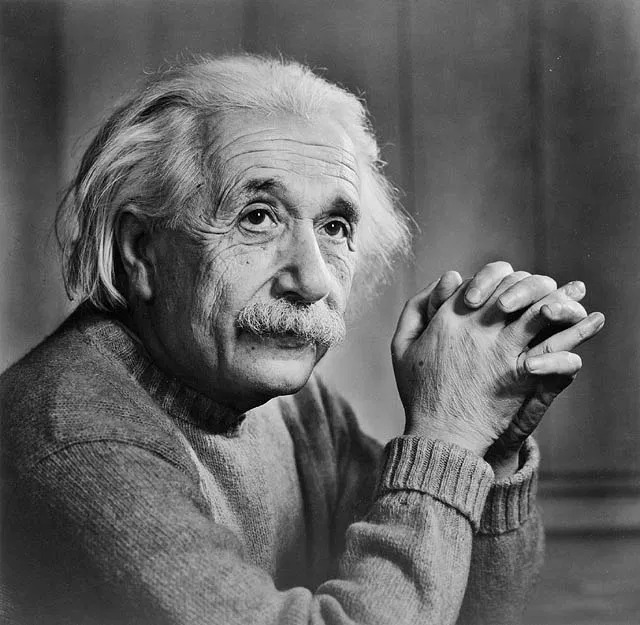

In [3]:
original_Einstein = cv2.imread('NA20B040/einstein.jpg')
cv2_imshow(original_Einstein)

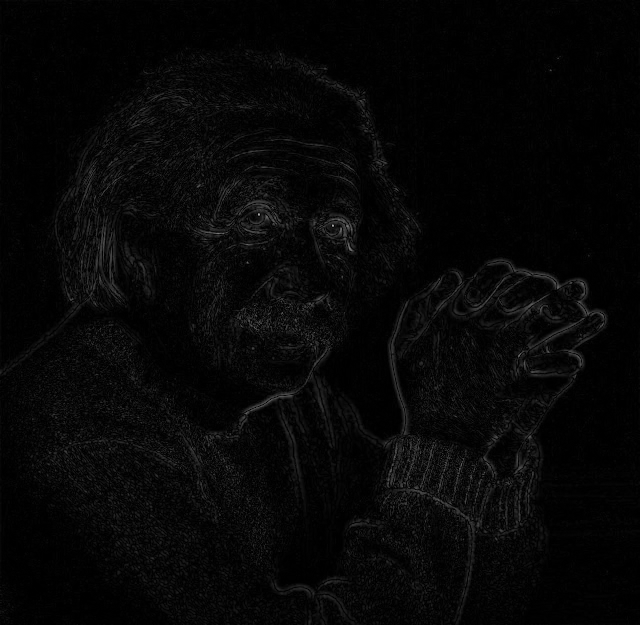

In [12]:
Einstein_5 = cv2.GaussianBlur(original_Einstein, (5,5),0.5)
Einstein_9 = cv2.GaussianBlur(original_Einstein, (9,9),6)
Einstein_Edge = cv2.absdiff(Einstein_5,Einstein_9)
cv2_imshow(Einstein_Edge)

##Task 2

In [60]:
def Back_Project(hsv_test):
  hsv_test = cv2.cvtColor(hsv_test,cv2.COLOR_BGR2HSV)
  hist_obj = cv2.calcHist([hsv_obj],[0, 1], None, [180, 256], [0, 180, 0, 256] )
  
  cv2.normalize(hist_obj,hist_obj,0,255,cv2.NORM_MINMAX)
  res = cv2.calcBackProject([hsv_test],[0,1],hist_obj,[0,180,0,256],1)
  
  disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
  cv2.filter2D(res, -1, disc, res)
  
  ret,thresh = cv2.threshold(res,80, 255,0)
  thresh = cv2.merge((thresh,thresh,thresh))
  res = cv2.bitwise_and(hsv_test,thresh)
  res = cv2.cvtColor(res,cv2.COLOR_HSV2BGR)
  return res

obj = cv2.imread('NA20B040/Barrel6png.png')
hsv_obj = cv2.cvtColor(obj,cv2.COLOR_BGR2HSV)

test = cv2.imread('NA20B040/Sample.png')

bp = Back_Project(test)

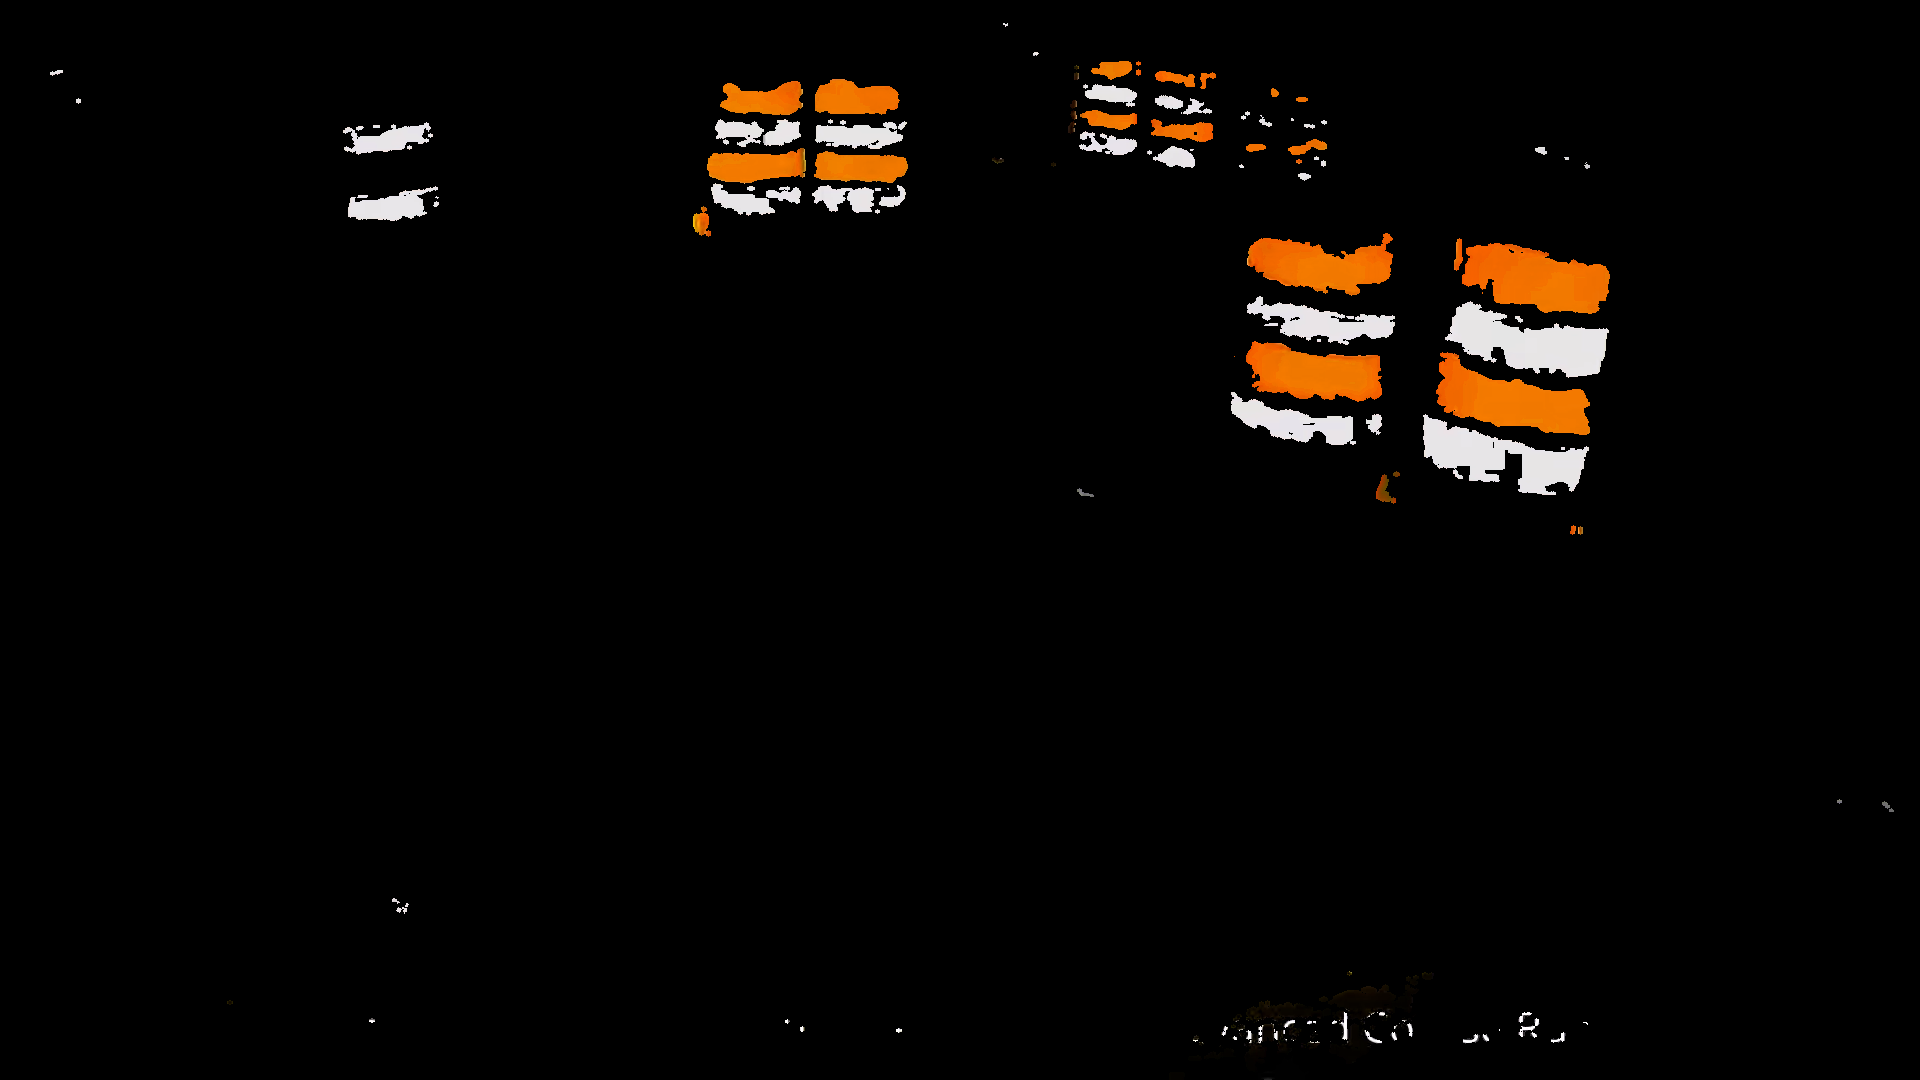

In [61]:
cv2_imshow(bp)

In [51]:
cap = cv2.VideoCapture('NA20B040/Barrel_recog.mp4')
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('Bar.avi', fourcc, 20.0, (int(cap.get(3)),int(cap.get(4))))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("end")
        break
    frame = Back_Project(frame)
    out.write(frame)
    #cv2_imshow(frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

end
